In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SONY': 'Sony',
               'PTR': 'PetroChina'}

In [3]:
def read_data(ticker_list,
          start=dt.datetime(2020, 1, 2),
          end=dt.datetime(2020, 4, 30)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

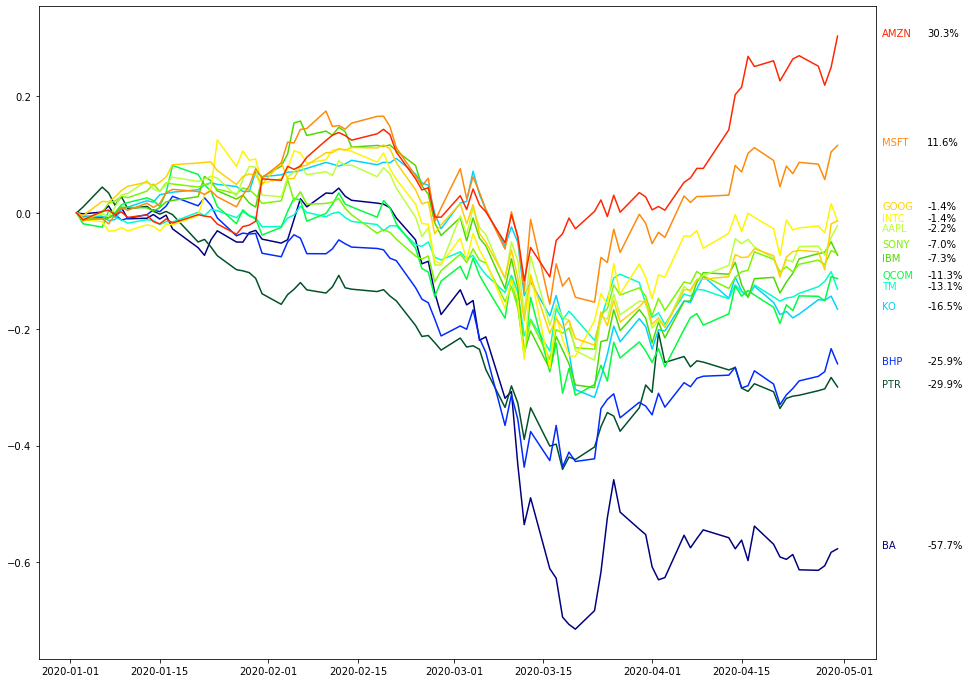

In [11]:
# pdPlotReturns
# Plots mutliple lines on one lineplot
# Inputs: dataframe columns as % returns, rows idx as datetime. sort Colours = False, Label offsets in y_offsets
# Outputs: Colourmapped multiple line plot
# Configuration: Change Label x_pos manually, colourmap editing.

def pdPlotReturns(x, sort=False, y_offsets={}):
    ret = x.pct_change()
    cumulativeret = ((1 + ret).cumprod() - 1)
    cumulativeret.iloc[0,:]=0 #set day 0 to val:0
    if sort: # if you want the colors to be sorted by end acc descending, sort=True
        cumulativeret = cumulativeret[list(cumulativeret.loc[cumulativeret.index.max()].sort_values(ascending=True).index)]
    else: pass
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    ax.set_prop_cycle(plt.cycler('color', plt.cm.gist_ncar(np.linspace(0, 1, cumulativeret.shape[1])/1.4))) # Colourmap here
    for col in cumulativeret.columns:              # iterate columns individually for easy(ish) labelling
        line, = ax.plot(col, data=cumulativeret)
        y_pos = cumulativeret[col][-1] 
        if col in y_offsets:
            y_pos += y_offsets[col]
        else: pass
        ax.text(dt.datetime(2020, 5, 7), y_pos, col, fontsize=10, color=line.get_color())
        ax.text(dt.datetime(2020, 5, 14), y_pos, f'{round(cumulativeret[col][-1]*100,1)}%', fontsize=10, )

    
pdPlotReturns(ticker,sort=True,y_offsets = {'GOOG':0.02,'AAPL':-0.01,'SONY':0.01,'IBM':-0.01})

In [5]:
# issue 1: too many lines for one plot -> sub plots
# issue 2: similar colours -> cycle line patterns
# issue 3: labelling -> git gud